In [73]:
import pandas as pd
import mlflow
import hydra
from superconduct_tc_reg.train import read_dataset
import os
from pathlib import Path
import torch
import omegaconf
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [37]:
os.environ["BASE_DIR"] = str(Path("./").absolute().parents[0])
os.environ["BASE_DIR"]

'/data/horse/ws/s4610340-superconduct/superconduct-tc-reg'

In [3]:
mlflow.set_tracking_uri("http://172.26.122.53:5000")

In [67]:
model_name = "superconduct_tc_reg-model-testing"
model_version = 1

model: torch.nn.Module = mlflow.pytorch.load_model(model_uri=f"models:/{model_name}/{model_version}")
model

DNNModel(
  (layers): ModuleList(
    (0): Linear(in_features=30, out_features=4096, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.21, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): Tanh()
    (5): Dropout(p=0.21, inplace=False)
    (6): Linear(in_features=4096, out_features=1, bias=True)
  )
)

In [65]:
cfg=omegaconf.OmegaConf.load("/data/horse/ws/s4610340-superconduct/superconduct-tc-reg/outputs/train-optimum-dnn-pca-adamw/2024-09-23_12-02-19/.hydra/config.yaml")
cfg

{'dir': {'base': '${oc.env:BASE_DIR}', 'data': '${dir.base}/data', 'out': '${dir.base}/outputs'}, 'dataset': {'file': 'train-minmax-no_cfs-pca.csv', 'n_components': 30, 'name': 'pca', 'dir': '${dir.data}/processed/${dataset.file}'}, 'split': {'_partial_': False, '_target_': 'superconduct_tc_reg.folds_gen.TrainValRandomSplitSingleFold', 'val_size': 0.25, 'stratified': False, 'split_algorithm_seed': 111}, 'model': {'hidden_size': 4096, 'n_hidden': 2, 'activation': 'Tanh', 'dropout': 0.21, 'dropout_seed': None, 'batch_norm': False, 'skip_conn': False}, 'optimizer': {'_partial_': True, '_target_': 'torch.optim.AdamW', 'lr': 0.00445, 'weight_decay': 0.00037}, 'lr_scheduler': {'_partial_': True, '_target_': 'torch.optim.lr_scheduler.ExponentialLR', 'gamma': 0.999}, 'trainer': {'max_epochs': 500, 'gradient_clip_val': 100.0, 'accelerator': 'gpu', 'deterministic': False, 'batch_size': 5300, 'devices': [6]}, 'tracking': {'_target_': 'lightning.pytorch.loggers.MLFlowLogger', '_partial_': True, 'e

In [66]:
df_train_val = read_dataset(cfg)
df_train_val

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28,pc_29,critical_temp
0,-0.760072,0.632861,-0.005633,0.205954,-0.061266,0.009457,-0.056623,-0.050663,0.035798,-0.051830,...,0.010587,0.027561,-0.035687,0.063172,-0.001388,0.057000,-0.021834,0.003375,-0.029790,29.00
1,-0.954494,0.323756,-0.140948,0.014345,0.055140,-0.160309,-0.138492,0.154380,-0.031449,0.058003,...,-0.119841,-0.011529,0.002635,0.086378,0.016899,0.042224,0.001658,0.036667,-0.038792,26.00
2,-0.725584,0.658725,-0.002053,0.225602,-0.054429,0.001070,-0.062875,-0.017677,0.069609,-0.045809,...,-0.014390,0.021977,-0.031387,0.064864,-0.008475,0.068464,-0.022705,0.009440,-0.034776,19.00
3,-0.743881,0.644796,-0.004184,0.215193,-0.058017,0.005267,-0.059692,-0.034942,0.051925,-0.048898,...,-0.000647,0.025016,-0.033838,0.063723,-0.004665,0.062450,-0.022274,0.005884,-0.032156,22.00
4,-0.787915,0.613294,-0.007108,0.189978,-0.067076,0.017842,-0.050732,-0.078792,0.006858,-0.057322,...,0.027729,0.031545,-0.038105,0.063408,0.004033,0.047297,-0.021001,0.000616,-0.025555,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.458121,-0.366652,0.066112,-0.172551,0.454688,0.078101,-0.335912,-0.163454,-0.009760,-0.028998,...,-0.076122,0.010038,0.118028,-0.022231,-0.041642,0.027545,-0.116729,0.020906,-0.005457,2.44
21259,-1.102695,0.132710,-0.137091,0.037698,0.130095,0.195354,-0.180732,-0.072055,-0.127050,0.221592,...,0.051290,-0.079799,-0.012927,-0.087913,-0.006317,-0.023241,-0.043969,0.037683,-0.036652,122.10
21260,1.996372,0.184068,-0.168859,-0.252544,-0.084022,-0.138223,-0.168591,-0.062990,0.103902,0.064411,...,0.064420,0.102269,0.157412,-0.033492,0.107315,-0.001131,0.007628,-0.043463,0.045618,1.98
21261,1.898402,0.085539,-0.155516,-0.321927,-0.143109,-0.001373,-0.048430,-0.218298,-0.054538,0.036676,...,0.045038,0.069291,0.154231,0.003743,0.088449,0.004371,0.018638,-0.034413,0.020704,1.84


In [79]:
spliter = hydra.utils.instantiate(cfg["split"])
(train_idx, val_idx) = next(spliter(elements=df_train_val.index))
target = cfg["target"]
features = [c for c in df_train_val.columns if c != target]


val_features = torch.tensor(df_train_val.loc[val_idx][features].to_numpy(), dtype=torch.float32)
val_targets = torch.tensor(df_train_val.loc[val_idx][[target]].to_numpy(), dtype=torch.float32)

model.eval()
with torch.no_grad():
    val_preds = model(val_features)

val_targets = val_targets.squeeze(-1)
val_preds = val_preds.squeeze(-1)
val_preds

tensor([45.0216, 72.3779, 11.3088,  ...,  2.4601, 78.3023,  3.1075])

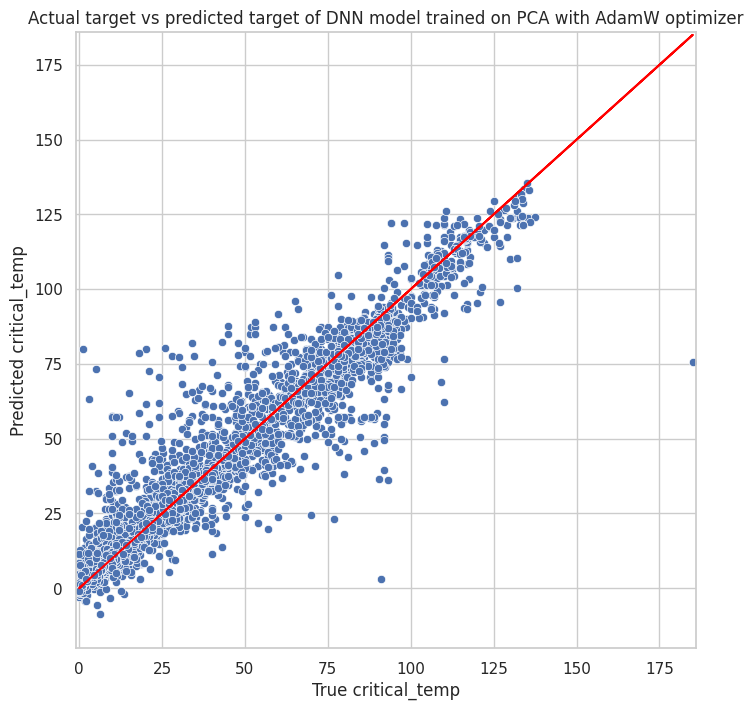

In [138]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.set_xlabel("True critical_temp")
ax.set_ylabel("Predicted critical_temp")
ax.set_xlim(val_targets.min()-1, val_targets.max()+1)
ax.set_ylim(val_targets.min()-20, val_targets.max()+1)
ax.set_title("Actual target vs predicted target of DNN model trained on PCA with AdamW optimizer")
sns.scatterplot(x=val_targets, y=val_preds, ax=ax)
plt.plot(val_targets, val_targets, color="red")

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


/tmp/ipykernel_2033826/2354823419.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_val_preds_cutted = df_val_preds.groupby(pd.cut(df_val_preds["true"], bins=bins)).mean()


Text(0, 0.5, 'true-predicted')

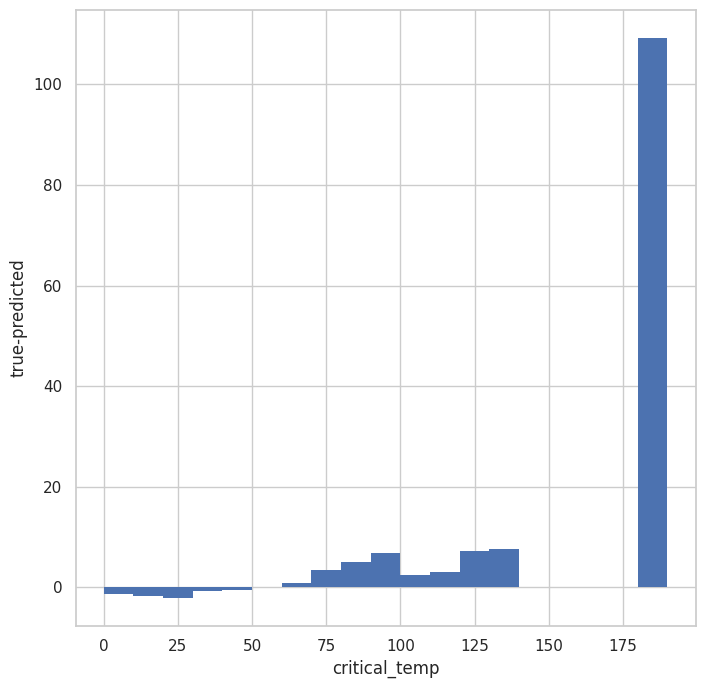

In [103]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
df_val_preds = pd.DataFrame({"true": val_targets, "predicted": val_preds})

bins = []
bin_width = 10
for i in range(0, 190+bin_width, bin_width):
    bins.append(i)

print(bins)

df_val_preds_cutted = df_val_preds.groupby(pd.cut(df_val_preds["true"], bins=bins)).mean()
df_val_preds_cutted

ax.stairs(df_val_preds_cutted["true"]-df_val_preds_cutted["predicted"], edges=bins, fill=True)
ax.set_xlabel("critical_temp")
ax.set_ylabel("true-predicted")